In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#Read the dataset from exel 
# If you are working on the cloud platform, you should replace the address here with the path on the cloud storage.
dataframe=pd.read_excel(r"C:\Users\pc\OneDrive\Masaüstü\makine öğrenmesi\streamlit frontent\data\Cilt_Kanseri.xlsx")
orjinaldataframe=pd.read_excel(r"C:\Users\pc\OneDrive\Masaüstü\makine öğrenmesi\streamlit frontent\data\Cilt_Kanseri.xlsx")

In [24]:
#Control the dataframe
dataframe.head(10)

,Cinsiyet,Kilo,Yaş,Genetik,SigaraKullanimi,KimyasalKullanimi,CiltTonu,BeslenmeŞekli,Alerji,UV Işını indeksi,RadyasyonOrani,YaraDurumu,YaraBoyutu,YaraRengi,YaraSayisi,Teşhis
0,1,50,22,0,0,0.000000,beyaz,0,0,1,0.000000,0,0,yok,0,0
1,0,65,24,0,1,0.015625,pembe,1,1,1,0.000000,1,0,yok,0,0
2,1,85,64,1,0,0.031250,bej,0,0,2,0.000000,0,0,beyaz,0,0
3,1,47,46,0,0,0.031250,siyah,0,0,1,0.018182,0,0,yok,0,1
4,0,96,45,0,0,0.046875,kahve,0,1,1,0.072727,0,0,beyaz,0,0
5,0,85,44,0,1,0.046875,beyaz,0,0,1,0.054545,1,1,pembe,0,0
6,1,76,35,1,0,0.062500,kahve,1,0,2,0.072727,0,0,yok,0,1
7,1,63,32,0,0,0.078125,siyah,0,1,1,0.090909,0,0,beyaz,0,0
8,1,59,26,0,0,0.109375,bej,0,0,1,0.090909,0,1,beyaz,2,0
9,0,64,33,0,0,0.125000,pembe,0,0,1,0.090909,1,0,yok,0,0


In [25]:
dataframe.shape

(100, 16)

## EDA

In [26]:
dataframe["CiltTonu"].value_counts()

beyaz    22
bej      22
siyah    20
pembe    19
kahve    17
Name: CiltTonu, dtype: int64

In [27]:
#Check the null values
dataframe.isnull().sum()

Cinsiyet             0
Kilo                 0
Yaş                  0
Genetik              0
SigaraKullanimi      0
KimyasalKullanimi    0
CiltTonu             0
BeslenmeŞekli        0
Alerji               0
UV Işını indeksi     0
RadyasyonOrani       0
YaraDurumu           0
YaraBoyutu           0
YaraRengi            0
YaraSayisi           0
Teşhis               0
dtype: int64

In [28]:
#Analysis the dataset
dataframe.describe()

,Cinsiyet,Kilo,Yaş,Genetik,SigaraKullanimi,KimyasalKullanimi,BeslenmeŞekli,Alerji,UV Işını indeksi,RadyasyonOrani,YaraDurumu,YaraBoyutu,YaraSayisi,Teşhis
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.410000,75.000000,44.26000,0.510000,0.490000,0.552344,0.480000,0.530000,7.260000,0.525818,0.470000,4.100000,7.110000,0.540000
std,0.494311,15.807555,15.32188,0.502418,0.502418,0.268762,0.502117,0.501614,4.655007,0.292725,0.501614,3.195641,5.150061,0.500908
min,0.000000,43.000000,20.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,63.000000,31.75000,0.000000,0.000000,0.390625,0.000000,0.000000,3.000000,0.268182,0.000000,1.000000,2.000000,0.000000
50%,0.000000,74.000000,43.00000,1.000000,0.000000,0.593750,0.000000,1.000000,7.000000,0.545455,0.000000,4.000000,8.000000,1.000000
75%,1.000000,86.000000,57.25000,1.000000,1.000000,0.753906,1.000000,1.000000,11.000000,0.786364,1.000000,7.000000,12.000000,1.000000
max,1.000000,109.000000,75.00000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000,10.000000,15.000000,1.000000


In [29]:
#numerates the different labels in a categorical data column
from sklearn.preprocessing import LabelEncoder
lbe=LabelEncoder()

In [30]:
#categorical data is converted to numeric value
lbe.fit_transform(dataframe["YaraRengi"])

array([4, 4, 0, 4, 0, 3, 4, 0, 0, 4, 3, 0, 0, 4, 0, 4, 0, 0, 4, 1, 1, 3,
       3, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 2, 1, 2, 1, 1, 2, 2, 1, 0, 0, 1,
       2, 3, 3, 1, 2, 1, 1, 3, 0, 0, 1, 2, 3, 3, 3, 1, 0, 0, 1, 1, 3, 2,
       3, 1, 1, 2, 1, 1, 3, 2, 1, 2, 0, 2, 1, 1, 3, 2, 2, 2, 2, 1, 3, 1,
       1, 2, 3, 3, 2, 2, 2, 1, 1, 1, 2, 2])

In [31]:
'''
converted numbers lined up in columns;
0= 'beyaz'
1= 'kahve'
2= 'kırmızı'
3= 'pembe'
4= 'yok'
'''
dataframe["YaraRengi"]=lbe.fit_transform(dataframe["YaraRengi"])

In [32]:
#categorical data is converted to numeric value
lbe.fit_transform(dataframe["CiltTonu"])

array([1, 3, 0, 4, 2, 1, 2, 4, 0, 3, 0, 0, 1, 4, 1, 2, 0, 3, 3, 4, 1, 3,
       0, 2, 0, 3, 1, 2, 4, 0, 1, 3, 1, 4, 2, 0, 3, 4, 1, 3, 0, 2, 4, 1,
       1, 2, 0, 2, 2, 4, 4, 0, 3, 3, 2, 0, 1, 3, 4, 2, 4, 4, 0, 0, 3, 4,
       1, 1, 2, 0, 3, 3, 2, 4, 1, 3, 2, 4, 1, 1, 0, 0, 1, 2, 4, 1, 0, 1,
       3, 3, 4, 4, 1, 0, 0, 3, 1, 2, 4, 0])

In [33]:
'''
converted numbers lined up in columns;
0= 'bej'
1= 'beyaz'
2= 'kahve'
3= 'pembe'
4= 'siyah'
'''
dataframe["CiltTonu"]=lbe.fit_transform(dataframe["CiltTonu"])

In [34]:
#Control the dataframe
dataframe.head(10)

,Cinsiyet,Kilo,Yaş,Genetik,SigaraKullanimi,KimyasalKullanimi,CiltTonu,BeslenmeŞekli,Alerji,UV Işını indeksi,RadyasyonOrani,YaraDurumu,YaraBoyutu,YaraRengi,YaraSayisi,Teşhis
0,1,50,22,0,0,0.000000,1,0,0,1,0.000000,0,0,4,0,0
1,0,65,24,0,1,0.015625,3,1,1,1,0.000000,1,0,4,0,0
2,1,85,64,1,0,0.031250,0,0,0,2,0.000000,0,0,0,0,0
3,1,47,46,0,0,0.031250,4,0,0,1,0.018182,0,0,4,0,1
4,0,96,45,0,0,0.046875,2,0,1,1,0.072727,0,0,0,0,0
5,0,85,44,0,1,0.046875,1,0,0,1,0.054545,1,1,3,0,0
6,1,76,35,1,0,0.062500,2,1,0,2,0.072727,0,0,4,0,1
7,1,63,32,0,0,0.078125,4,0,1,1,0.090909,0,0,0,0,0
8,1,59,26,0,0,0.109375,0,0,0,1,0.090909,0,1,0,2,0
9,0,64,33,0,0,0.125000,3,0,0,1,0.090909,1,0,4,0,0


In [35]:
dataframe.dtypes

Cinsiyet               int64
Kilo                   int64
Yaş                    int64
Genetik                int64
SigaraKullanimi        int64
KimyasalKullanimi    float64
CiltTonu               int32
BeslenmeŞekli          int64
Alerji                 int64
UV Işını indeksi       int64
RadyasyonOrani       float64
YaraDurumu             int64
YaraBoyutu             int64
YaraRengi              int32
YaraSayisi             int64
Teşhis                 int64
dtype: object

In [36]:
dataframe.columns

Index(['Cinsiyet', 'Kilo', 'Yaş', 'Genetik', 'SigaraKullanimi',
       'KimyasalKullanimi', 'CiltTonu', 'BeslenmeŞekli', 'Alerji',
       'UV Işını indeksi', 'RadyasyonOrani', 'YaraDurumu', 'YaraBoyutu',
       'YaraRengi', 'YaraSayisi', 'Teşhis'],
      dtype='object')

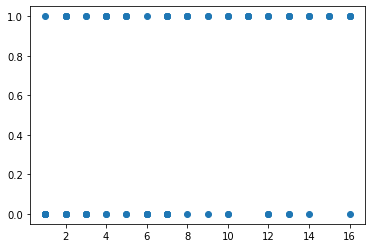

In [37]:
# Check the how effect UV Işını indeksi to Teşhis
plt.scatter(x = dataframe["UV Işını indeksi"], y= dataframe["Teşhis"])

e:\Anaconda\envs\proje\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Teşhis', ylabel='Density'>

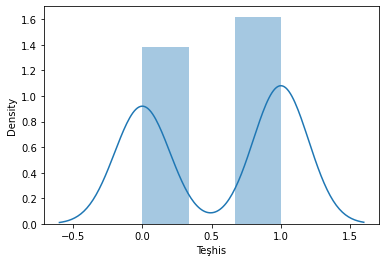

In [38]:
#look at the density of the diagnosis
sns.distplot(dataframe["Teşhis"])

## Creating Model

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.metrics import accuracy_score

In [40]:
data = dataframe.copy()

In [41]:
y = data["Teşhis"] #predictions
x = data.drop(["Teşhis"], axis=1) #another values (without y)
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.80      0.80      0.80        10

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20



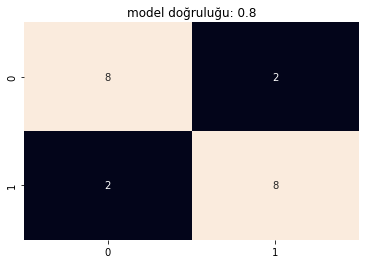

In [42]:
rf_model=RandomForestClassifier().fit(x_train,y_train)
y_pred_rf=rf_model.predict(x_test)
rf_score= accuracy_score(y_pred_rf,y_test)
cf_matrix_rf = confusion_matrix(y_pred_rf,y_test)
sns.heatmap(cf_matrix_rf,annot=True,cbar=False, fmt= "g")
plt.title("model doğruluğu: " + str(rf_score))
print(classification_report(y_pred_rf,y_test))

In [43]:
cross_val_score(rf_model,x,y,cv=5)

array([0.5 , 0.2 , 0.25, 0.65, 0.55])

In [44]:
rf_model.score(x_train,y_train)

1.0

In [45]:
rf_model.score(x_test,y_test)

0.8

In [46]:
import pickle

In [47]:
classifier = svm.SVC(kernel='linear')

In [51]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [54]:
filename='trained_model.sav'
pickle.dump(classifier,open(filename, 'wb'))

In [55]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))


In [56]:
input_data = (1,50,22,0,0,0,0,1,0,0,1,0,4,0,0)
#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)

print(prediction)

if (prediction[0] == 0): print('The person is not skin cancer')
else: print('The person is skin cancer')

[0]
The person is not skin cancer


e:\Anaconda\envs\proje\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
